In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
wifi = pd.read_csv("../dataset/dataset.csv")
del wifi["Unnamed: 12"]
wifi

zone = np.array([1,2,3,4])
colonne = wifi.columns.values
colonne = colonne[np.logical_and(colonne != "macro_zone", colonne != "micro_zone")]

In [4]:
X = wifi[[col for col in wifi if col != 'macro_zone' and col != 'micro_zone']]
y = wifi["micro_zone"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [5]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=80)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

0.988
0.833


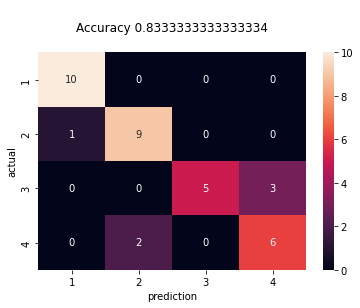

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline

sns.heatmap(
    pd.crosstab(
        y_test,
        y_pred,
        rownames=["actual"],
        colnames=["prediction"],
    ),
    annot=True,
)

accuracy = metrics.accuracy_score(y_test, y_pred)
plt.title(f"\nAccuracy {accuracy}\n")

print(f"{clf.score(X_train, y_train):.3f}")
print(f"{clf.score(X_test, y_test):.3f}")


plt.show()

In [8]:
#probability
test = np.array([[-120,-120,-73,-77,-75,-73,-120,-120,-120,-69]])
p = clf.predict_proba(test)
for i, s in enumerate(clf.classes_):
    print(f"zona {s} prob {p[0,i]}")

zona 1 prob 0.1875
zona 2 prob 0.0125
zona 3 prob 0.5875
zona 4 prob 0.2125


/home/rdfilippo/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [9]:
#feature importance
for i, f in enumerate(colonne):
    print(f"importanza di {f}: {clf.feature_importances_[i]:.2f}")

importanza di itis-wifi2: 0.08
importanza di AP_SMART50: 0.00
importanza di itis-wifi: 0.21
importanza di AP_ITISLI03_5.0: 0.00
importanza di wifi-lab01: 0.16
importanza di AP_ITISLI02: 0.20
importanza di itis-pvt: 0.11
importanza di AP_SMART25: 0.08
importanza di AP_ITISLI03_2.5: 0.00
importanza di wifi-itis: 0.16


In [10]:
# export trained model

import pickle
filename = "wifi_model.pkl"

with open(filename, "wb") as file:
    pickle.dump(clf, file)